In [1]:
%pylab  notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd     #serve per le colonne di dati
from scipy.odr import * #serve per il fitting
from scipy import stats #serve per la pdf del chi2
from scipy.signal import argrelextrema #to find the relative extrema

Aggiornata capacità

In [3]:
df = pd.read_csv('160526002.txt', delimiter='\t', usecols=[0,1,2,3], header=None)
df.columns = [ 't', 'x1', 'x2', 'x3' ]
df = df[(df.t>=0.0004) & (df.t <=0.025)]
df = df.reset_index(drop=True)
df.x1 += 0.011813256048387098
df.x2 += 0.023449313256048387
#remove offset
df['x1'] = df['x1']*-2
df['x2'] = df['x2']*2
df['x3'] = df['x3']*7.41
x = df['t']
df.head()

t        x1        x2         x3
0  0.000406  0.210748  0.176293  13.287708
1  0.000412  0.166803  0.154321  14.716882
2  0.000419  0.174127  0.149438  16.607373
3  0.000426  0.174127  0.156762  19.908948
4  0.000432  0.183893  0.164086  20.514990

<IPython.core.display.Javascript object>


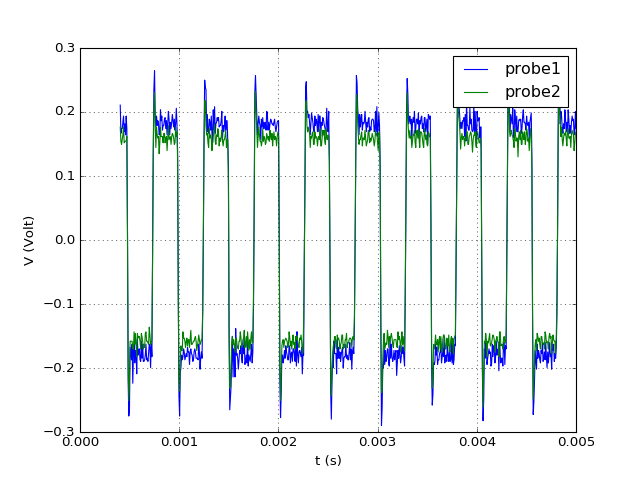

In [4]:
#gives an idea of the signal
plt.figure()
plt.xlim(0., 0.005)
plt.grid(True)
plt.plot(x, df['x1'], label="probe1")
plt.plot(x, df['x2'], label="probe2")
plt.xlabel("t (s)")
plt.ylabel("V (Volt)")
#plt.plot(x, df['x3'])
plt.legend()

In [5]:
#finding an array of relative maxima
v_in = np.array(df['x3'])
maxima = argrelextrema(v_in, np.greater, order=10) #check the docs for the meaning of order
maxima = maxima[0]
minima = argrelextrema(v_in, np.less, order=10)
minima = minima[0]
#average of v_max
v_max_avg = df['x3'][maxima].mean()
v_min_avg = df['x3'][minima].mean()
v_max_std = df['x3'][maxima].std()
v_min_std = df['x3'][minima].std()

print(v_max_avg, v_min_avg)

29.6729868787 -51.9054415616


In [6]:
time_maxima = df['t'][maxima]
time_minima = df['t'][minima]

periods = np.diff(time_maxima.values)
period_avg = np.average(periods)
period_std = np.std(periods)
v_std = np.std(v_max_std**2 + v_min_std**2)

v_point = 2*( v_max_avg - v_min_avg )/ period_avg
v_point_std = np.sqrt( (4/period_avg**2) * v_std**2 + ((4*(v_max_avg - v_min_avg)**2)/(period_avg**4))*period_std**2   )

print(v_point, v_point_std)

306602.505306 59638.7332747


In [7]:
#assuming to take the resistance from the fit
resistance = 502

#v_r estimation
v_r_1 = df['x1'].abs()
v_r_1 = v_r_1.mean()
v_r_1_std = v_r_1.std()

v_r_2 = df['x2'].abs()
v_r_2 = v_r_2.mean()
v_r_2_std = v_r_2.std()

#current estimation
i_1 = v_r_1 / resistance
i_2 = v_r_2 / resistance
i_1_std = v_r_1_std / resistance
i_2_std = v_r_2_std /resistance

#capacity estimation
c_1 = i_1 / v_point
c_2 = i_2 / v_point
c_1_std = np.sqrt ( (1/v_point**2)*i_1_std**2 + (i_1**2 / v_point**4)* v_point_std**2)
c_2_std = np.sqrt ( (1/v_point**2)*i_2_std**2 + (i_2**2 / v_point**4)* v_point_std**2)

print("Capacity 1/short: {} pm {} F".format(c_1, c_1_std))
print("Capacity 2/long: {} pm {} F".format(c_2, c_2_std))

Capacity 1/short: 1.1753297591617044e-09 pm 2.2861906476098968e-10 F
Capacity 2/long: 1.0343964776353805e-09 pm 2.0120545188758968e-10 F
